# Tutorial week 3

In [30]:
pip install opencv-contrib-python

In [31]:
import sys
# Python 3.7 is required
assert sys.version_info >= (3, 7)

import cv2 as cv
import numpy as np

# Make sure that OpenCV optimization is enabled
if not cv.useOptimized():
    cv.setUseOptimized(True)
    
cv.useOptimized()

True

## 1. Load and display the image 'dog.jfif'. Save the image in png format.

In [32]:
img1 = cv.imread('images/dog.jfif')
cv.imshow("dog", img1)
cv.waitKey(0)
cv.destroyAllWindows()
cv.imwrite('dog.png', img1)

True

## 2. *Suggest 2 ways and write codes to display 2 images simultaneously.* You can use any image snapped from your handphone, downloaded from internet or images from weekly materials on MS teams. The 2 images are original color image and its corresponding grayscale image.

In [33]:
#Way 1: Display using OpenCV
img2 = cv.imread('images/soccer.jpg')
img2_grayscale = cv.imread('images/soccer.jpg', 0)

cv.imshow("original", img2)
cv.imshow('grayscale', img2_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

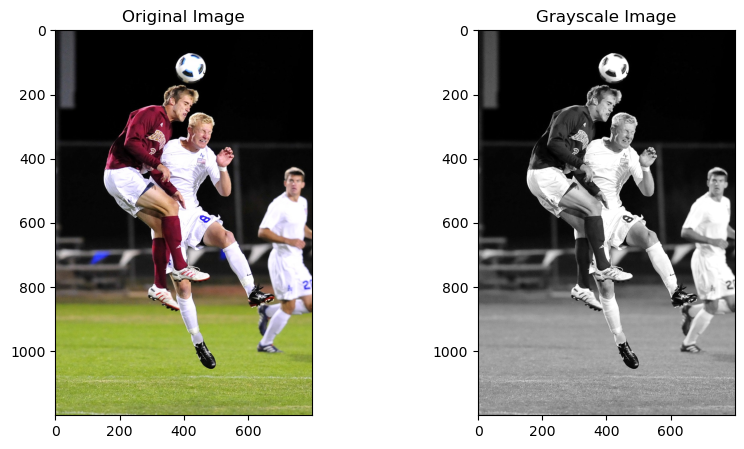

In [34]:
#Way 2: Display with Matplotlib
import matplotlib.pyplot as plt

img3 = cv.imread('images/soccer.jpg')
img3_grayscale = cv.imread('images/soccer.jpg', 0)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(img3_grayscale, cmap='gray')

plt.show()


## 3. Write codes that performs the following:
    * Load the video “img_pexels.mp4” into the Python environment, resize it and display the videos with smaller frames (The frames can be of any size, as long as it is smaller). You can specify an arbitrary frame rate.
    * Save it as a separate files: “smaller_img_pexels.avi” or "smaller_img_pexels.mp4"

In [35]:

# Load the video
video = cv.VideoCapture('videos/img_pexels.mp4')

if not video.isOpened():
    sys.exit('Invalid video path')
    
frame_width = int(video.get(cv.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv.CAP_PROP_FRAME_HEIGHT))

new_width = frame_width // 2
new_height = frame_height // 2

output_video = cv.VideoWriter('smaller_img_pexels.mp4', 
                               cv.VideoWriter_fourcc('M', 'J', 'P', 'G'), 
                               video.get(cv.CAP_PROP_FPS), 
                               (new_width, new_height))

while True:
    ret, frame = video.read()
    if not ret:
        break
    
    resized_frame = cv.resize(frame, (new_width, new_height))
    cv.imshow('Resized Video', resized_frame)   
    output_video.write(resized_frame)
    
    # Break on ESC key press
    if cv.waitKey(1) & 0xFF == 27:
        break

video.release()
output_video.release()
cv.destroyAllWindows()

## 4. Enlarge the image "dog.jfif" by using different techniques:
    1) Linear interpolation
    2) Cubic interpolation
    3) Nearest neighbor interpolation.

Perform profiling on each method. Comment on the **execution times** and **quality of resulting images**.

In [43]:
# Linear Interpolation

img4 = cv.imread('images/dog.jfif')
resizedA_img4 = cv.resize(img4,None, fx=1.5,fy=1.5,interpolation = cv.INTER_LINEAR)
cv.imshow('Linear Interpolation', resizedA_img4)
cv.waitKey(0)
cv.destroyAllWindows()

# Generally faster
# produces smoother images but a bit blurry compared to cubic interpolation

In [42]:
# Cubic Interpolation

img4 = cv.imread('images/dog.jfif')
resizedB_img4 = cv.resize(img4,None, fx=1.5,fy=1.5,interpolation = cv.INTER_CUBIC)
cv.imshow('Cubic Interpolation', resizedB_img4)
cv.waitKey(0)
cv.destroyAllWindows()

# Takes more time, slower than Linear Interpolation
# Higher quality images with less blurring

In [44]:
# Nearest Neighbour Interpolation

img4 = cv.imread('images/dog.jfif')
resizedC_img4 = cv.resize(img4,None, fx=1.5,fy=1.5,interpolation = cv.INTER_NEAREST)
cv.imshow('Nearest Neighbour Interpolation', resizedC_img4)
cv.waitKey(0)
cv.destroyAllWindows()

# Fastest method
# Produces blocky and pixelated images (low quality image)